<a href="https://colab.research.google.com/github/MengOonLee/BertelsmannAITrack/blob/Lesson05/NeuralNetworksInPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import packages
import numpy as np
import torch
import helper
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
# Import MNIST dataset
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST("MNIST_data/", download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

9920512it [00:01, 5402403.74it/s]                             


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 125660.65it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw


1654784it [00:00, 2044769.41it/s]                            
0it [00:00, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


8192it [00:00, 47599.49it/s]            


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!


In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


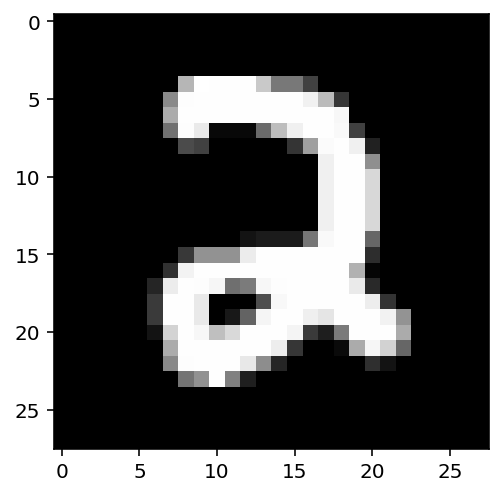

In [4]:
plt.imshow(images[1].numpy().squeeze(), cmap="Greys_r");

In [0]:
# Activation
def activation(x):
  return 1/(1+torch.exp(-x))

In [6]:
# Flatten the input images
inputs = images.view(images.shape[0],-1)
inputs.shape

torch.Size([64, 784])

In [8]:
# Create parameters
w1 = torch.randn(784,256)
b1 = torch.randn(256)

h = activation(torch.mm(inputs, w1) + b1)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

out = torch.mm(h, w2) + b2
out.shape

torch.Size([64, 10])

In [0]:
# Softmax
def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1,1)

In [11]:
# Probability
probabilities = softmax(out)
print(probabilities.shape)
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])
